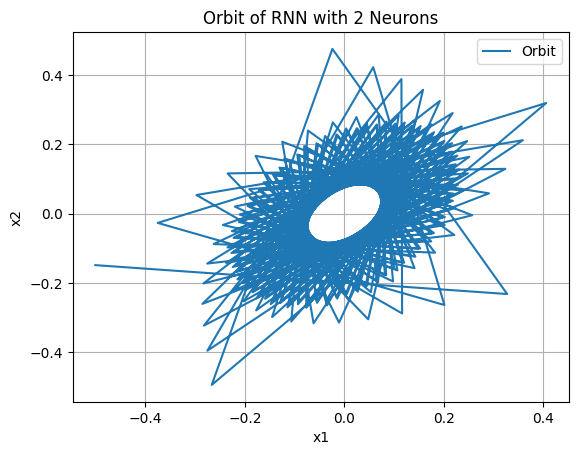

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Define the activation function (tanh)
def activation(x):
    return np.tanh(x)

# Define the RNN update function
def rnn_update(x, W, b):
    return activation(np.dot(W, x) + b)

# Simulate the dynamics of the 2-neuron RNN
def simulate_rnn(W, b, x0, steps=100):
    orbit = np.zeros((steps, 2))
    x = x0
    for t in range(steps):
        x = rnn_update(x, W, b)
        orbit[t] = x
    return orbit

# Initial state, parameters (weights and biases)
x0 = np.array([0.5, 0.5])
W = np.array([[-0.5, -0.6], [0.8, -1.1]])  # Example weight matrix
b = np.array([0, 0])  # Biases

# Simulate the system and plot the orbit
orbit = simulate_rnn(W, b, x0, steps=200)
plt.plot(orbit[:, 0], orbit[:, 1], label="Orbit")
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Orbit of RNN with 2 Neurons')
plt.legend()
plt.grid(True)
plt.show()

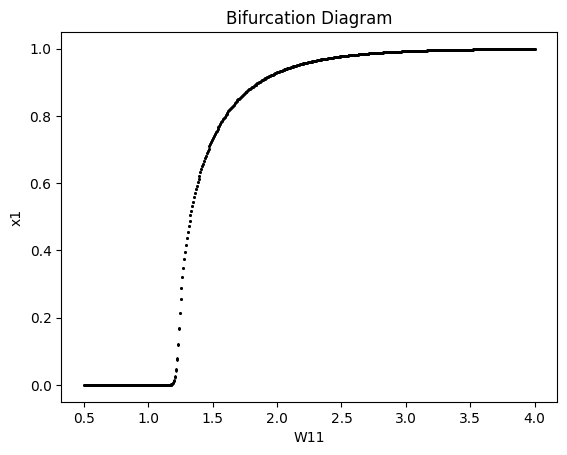

In [7]:
def bifurcation_diagram(W_range, b, x0, steps=100, plot_steps=10):
    fig, ax = plt.subplots()
    for W_val in W_range:
        W = np.array([[W_val, -0.6], [0.8, -1.1]])  # Vary weight W11
        orbit = simulate_rnn(W, b, x0, steps)
        ax.plot([W_val]*plot_steps, orbit[-plot_steps:, 0], 'k.', markersize=1)
    ax.set_xlabel('W11')
    ax.set_ylabel('x1')
    ax.set_title('Bifurcation Diagram')
    plt.show()

# Range of W11 to explore
W_range = np.linspace(0.5, 4.0, 500)
bifurcation_diagram(W_range, b, x0)


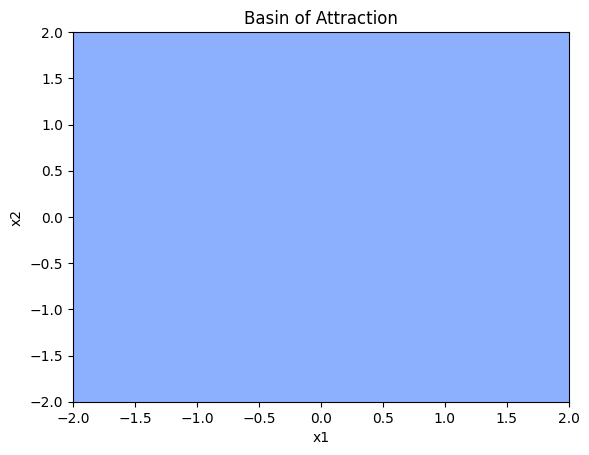

In [8]:
def basin_of_attraction(W, b, xlim, ylim, steps=200):
    resolution = 200
    x_vals = np.linspace(xlim[0], xlim[1], resolution)
    y_vals = np.linspace(ylim[0], ylim[1], resolution)
    X, Y = np.meshgrid(x_vals, y_vals)
    Z = np.zeros((resolution, resolution))

    for i in range(resolution):
        for j in range(resolution):
            x0 = np.array([X[i, j], Y[i, j]])
            orbit = simulate_rnn(W, b, x0, steps)
            final_point = orbit[-1]
            if np.allclose(final_point, orbit[-2], atol=1e-2):  # Check for fixed points
                Z[i, j] = 1
            else:
                Z[i, j] = 0

    plt.contourf(X, Y, Z, cmap="coolwarm")
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title('Basin of Attraction')
    plt.show()

# Define the parameter space
basin_of_attraction(W, b, [-2, 2], [-2, 2])
